In [1]:
!pip install  pandas numpy matplotlib scikit-learn

In [2]:
!pip install -U pyod==1.1.0

In [3]:
!pip install tensorflow==2.15 keras==2.15 pyod==1.1.0


In [4]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard (2).csv


Dataset Shape: (284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                992       
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                      

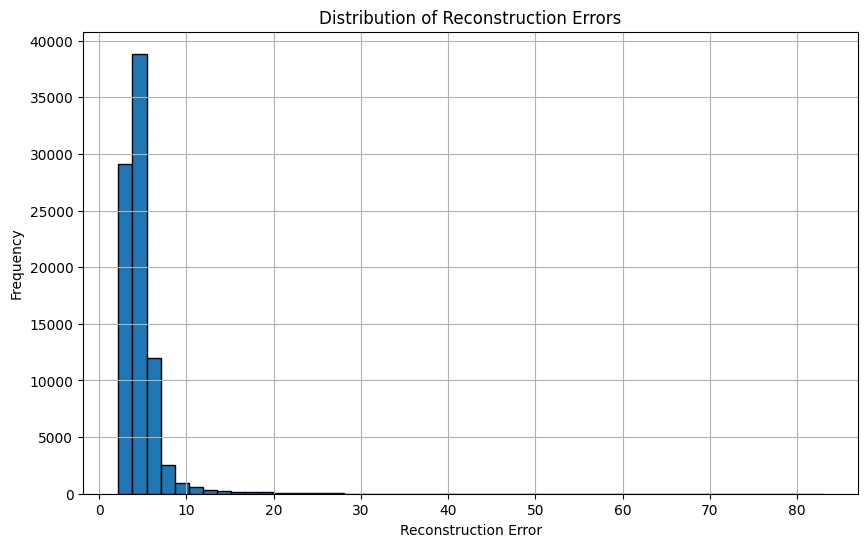

In [7]:
import pandas as pd
import numpy as np
from pyod.models.auto_encoder import AutoEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the uploaded CSV
df = pd.read_csv("creditcard.csv")

# Preview
print("Dataset Shape:", df.shape)
print(df["Class"].value_counts())

# Separate features and target
X = df.drop(columns=["Class"])
y = df["Class"]

# Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize and train the AutoEncoder model
clf = AutoEncoder(hidden_neurons=[32, 16, 16, 32], epochs=30, contamination=0.001)
clf.fit(X_train)

# Predict
y_test_scores = clf.decision_function(X_test)
y_test_pred = clf.predict(X_test)

# Evaluate
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_test_pred))

# Plot decision scores
plt.figure(figsize=(10,6))
plt.hist(y_test_scores, bins=50, edgecolor='black')
plt.title("Distribution of Reconstruction Errors")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()